# ML Project 10

+ Bu projede elimdeki veri seti kredi kartı dolandırıcılığıyla ilgili. Time, V1, V2, ..., V28, Amount, Class olacak şekilde 30'u aşkın sütun var. V1,..,V28 sütunlarının isimlerinin herhangi bir anlamı yok. Veri gizliliğinden dolayı böyle isimlendirilmiş.

## Importing Libraries and Data 

In [1]:
import os 
os.chdir("C:/Users/ogulc/ÖNEMLİ ÇALIŞMALAR")

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, precision_score, f1_score, recall_score, roc_auc_score
from sklearn.model_selection import cross_val_score

In [3]:
project_10 = pd.read_csv("creditcard.csv")

In [4]:
project_10

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Analysing and Visualizing Data (EDA) 

### .info()

In [5]:
project_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### .describe()

In [6]:
project_10.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### .value_counts()

In [7]:
project_10["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

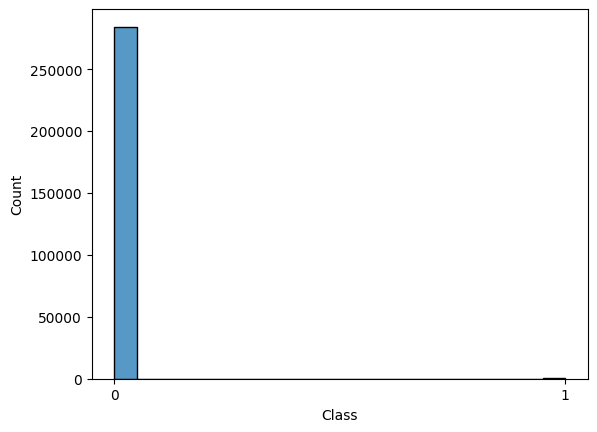

In [8]:
g= sns.histplot(project_10["Class"])
g.set_xticks([0,1])

+ Görüleceği üzere 0 kategorisindeki veri sayısı, 1'e göre kat kat fazla. Bu da veri setinin çok dengesiz olduğu anlamına geliyor. 

### Making `Class == 1` and `Class == 0` Datasets and Taking Sample from `Class == 0` and Concating `class_0_sample` and `class_1` (2nd Dataset for Analysing)

In [9]:
class_0 = project_10[project_10["Class"] == 0]

In [10]:
class_0.shape

(284315, 31)

In [11]:
class_0_sample = class_0.sample(n = 492)
class_0_sample.shape

(492, 31)

In [12]:
class_1 = project_10[project_10["Class"] == 1]

In [13]:
class_1.shape

(492, 31)

In [14]:
project_10_new = pd.concat([class_0_sample, class_1])

In [15]:
project_10_new

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
105712,69657.0,1.022768,-0.031929,0.043077,1.396977,-0.141933,-0.375753,0.300350,-0.073399,0.164874,...,0.037357,0.059931,-0.186388,0.084679,0.705674,-0.238310,0.003276,0.024311,93.24,0
191808,129417.0,-1.407291,1.499190,-1.296093,2.550997,1.433567,0.201036,0.984514,0.602373,-2.002463,...,0.161517,0.283070,0.182094,-0.032009,-0.565641,-0.241180,-0.181775,-0.087476,37.07,0
158631,111551.0,2.056367,0.022737,-0.931016,0.629097,-0.110650,-1.179270,0.072847,-0.396409,1.880872,...,-0.440855,-0.915913,0.353788,-0.024535,-0.336632,0.157564,-0.100642,-0.066316,5.99,0
108763,71058.0,1.110159,-0.079453,-0.008265,0.153194,-0.396367,-1.272660,0.477462,-0.366084,-0.142625,...,-0.379371,-1.350226,0.117250,0.422532,0.078263,0.610089,-0.116968,0.021871,105.96,0
89885,62770.0,-1.269984,-0.494303,-0.035804,-2.754880,0.847527,3.708793,-0.550938,1.434689,-1.240464,...,0.531536,0.858016,0.168816,1.010224,0.393129,-0.173085,0.161079,0.087913,199.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


### .skew()

In [16]:
project_10.skew()

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

+ Verideki sütunlardaki değerlerin dağılımının, ortalamadan sapma derecelerini gösterir.

In [17]:
project_10.drop(columns = ["Time", "Amount", "Class"], axis = 1).skew().mean()

np.float64(-0.6590729378797026)

### Hist Graph of Columns

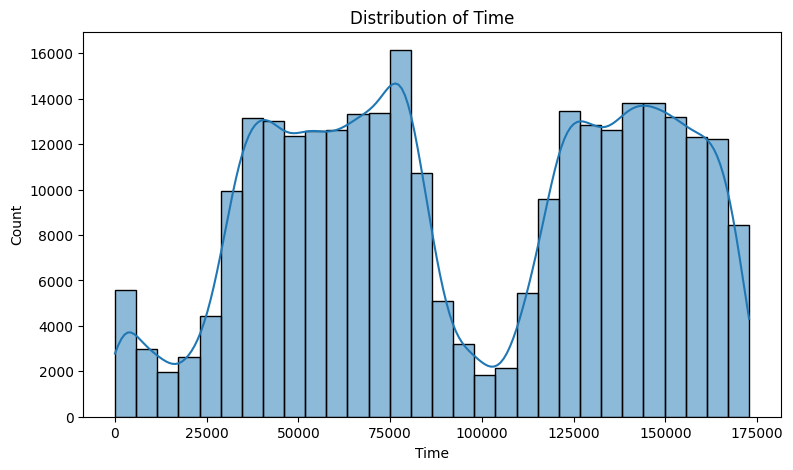

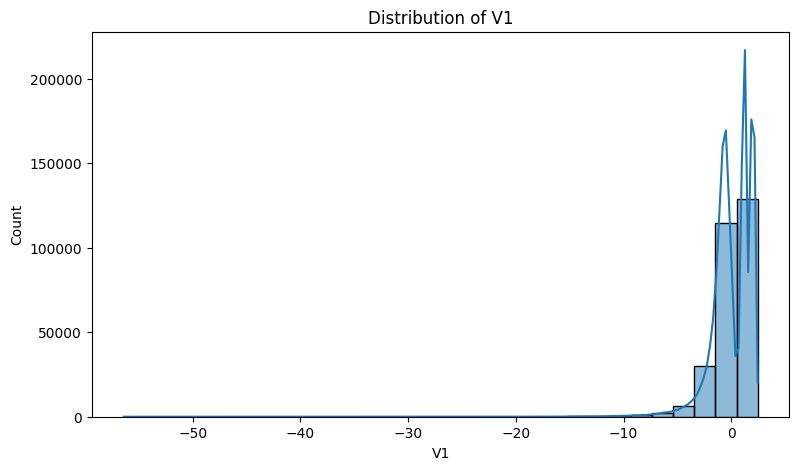

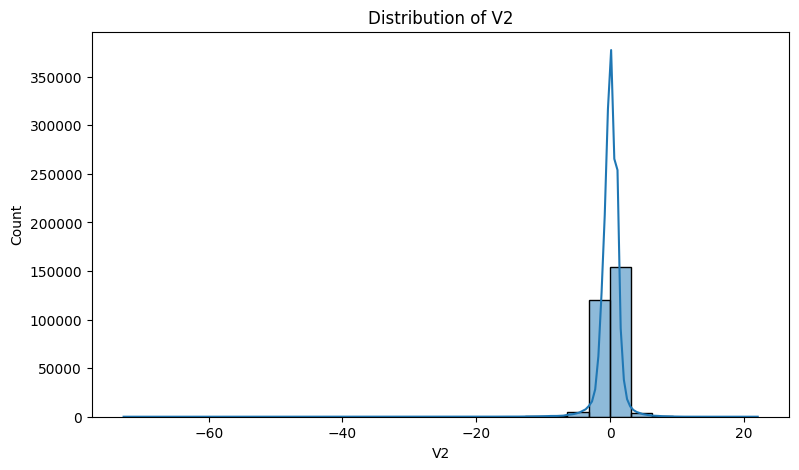

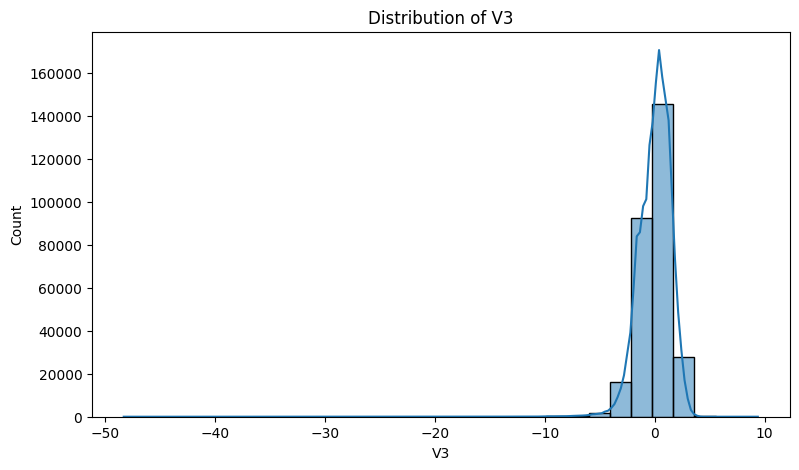

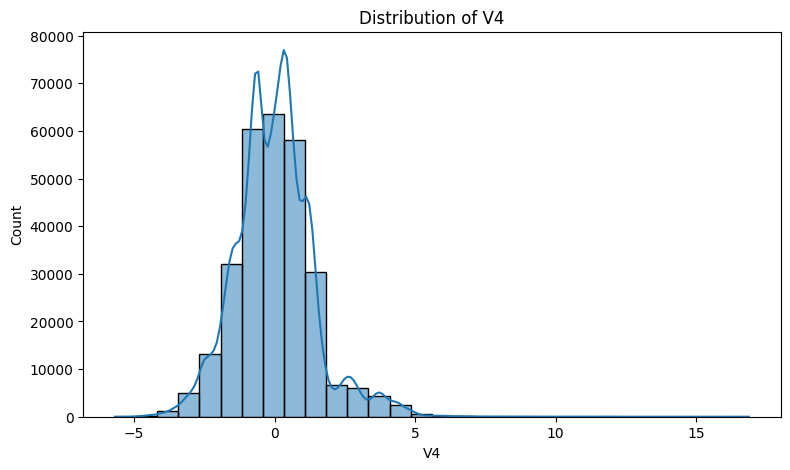

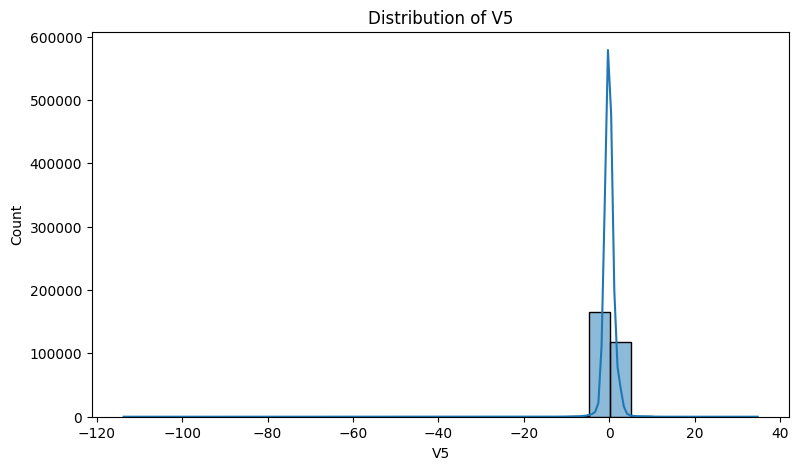

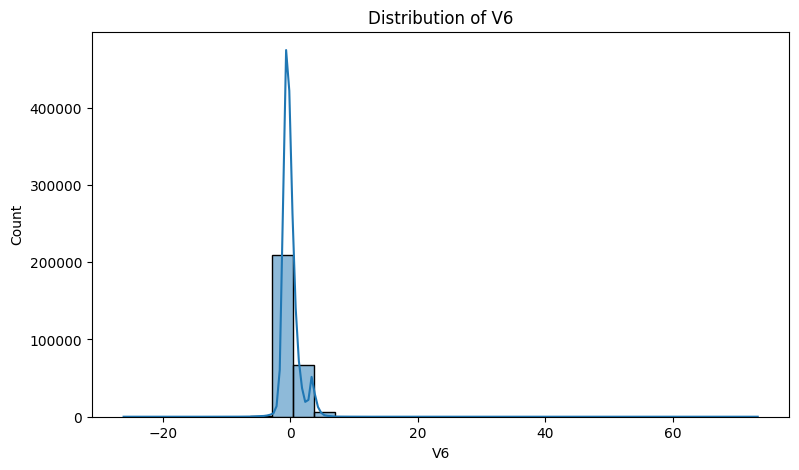

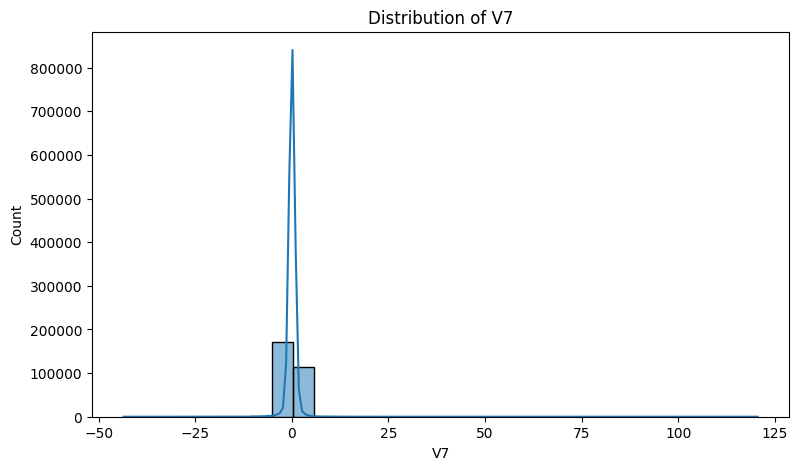

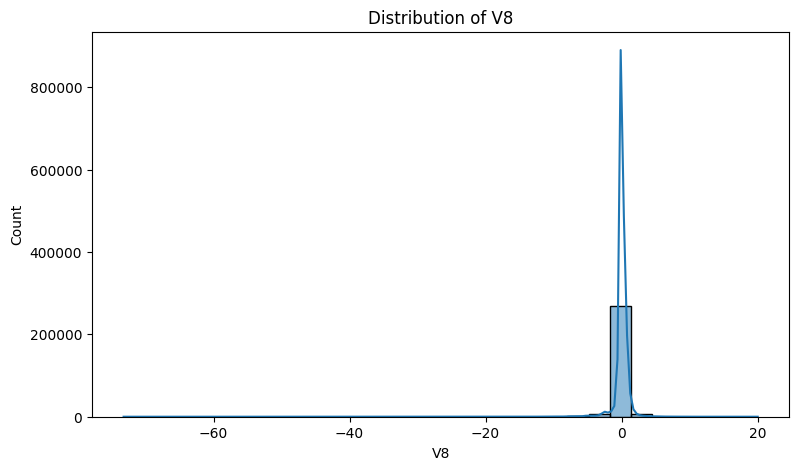

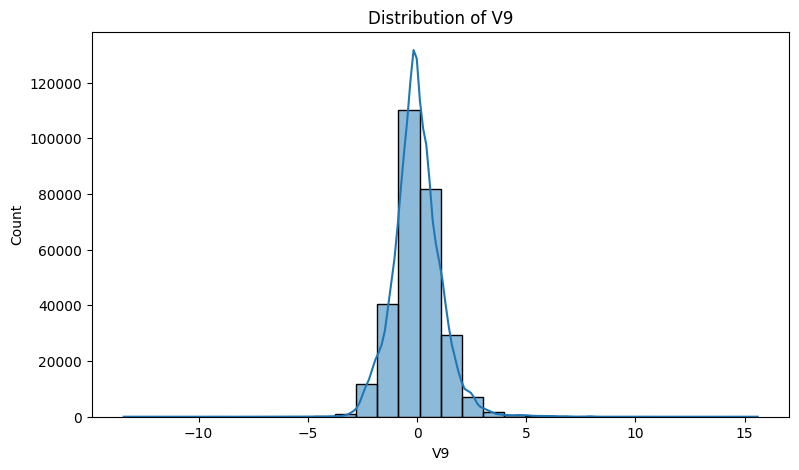

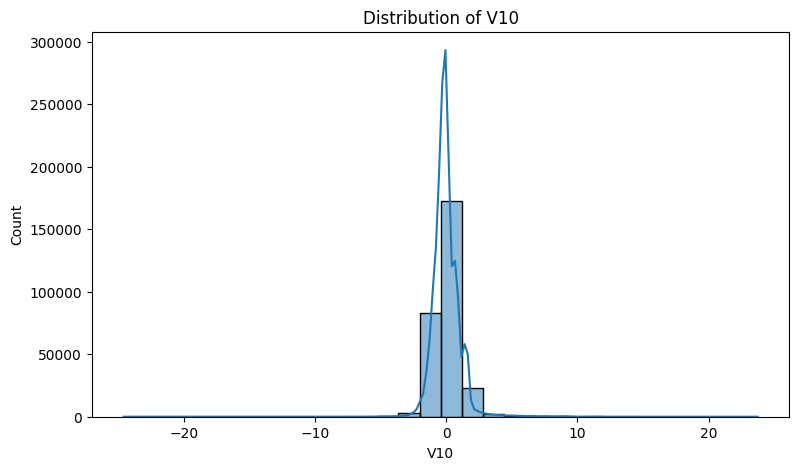

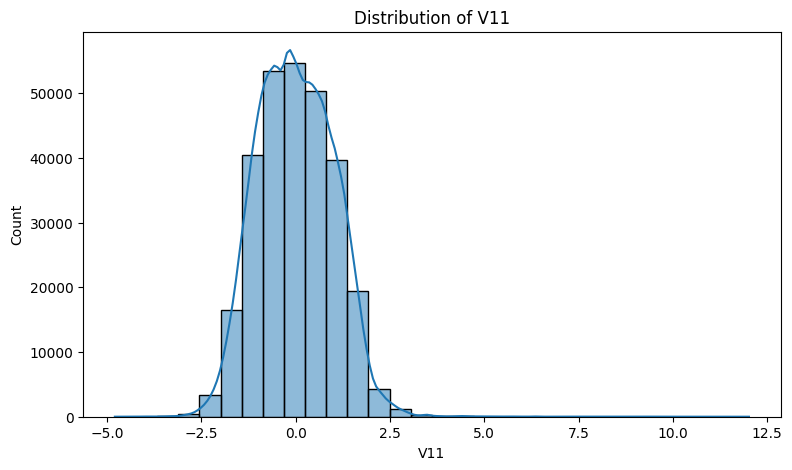

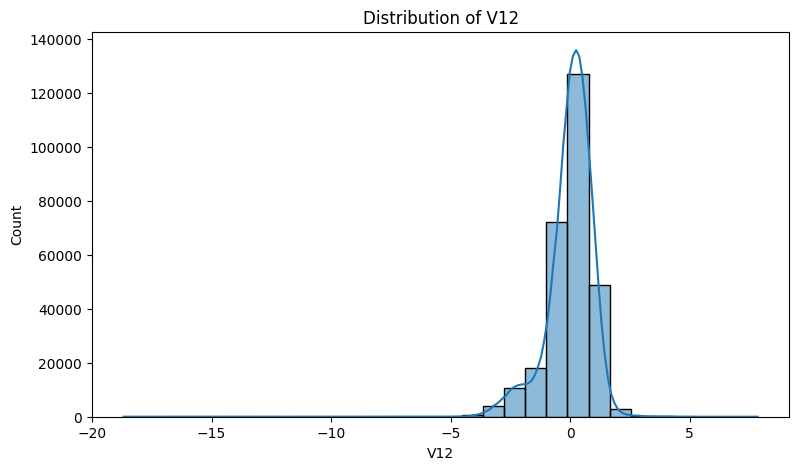

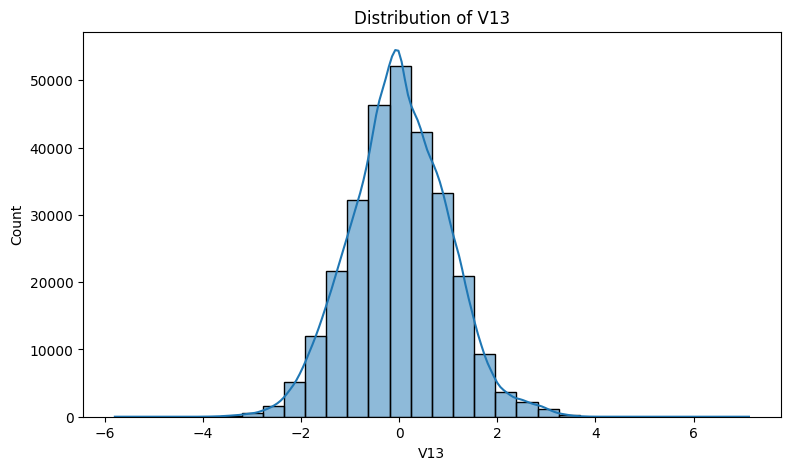

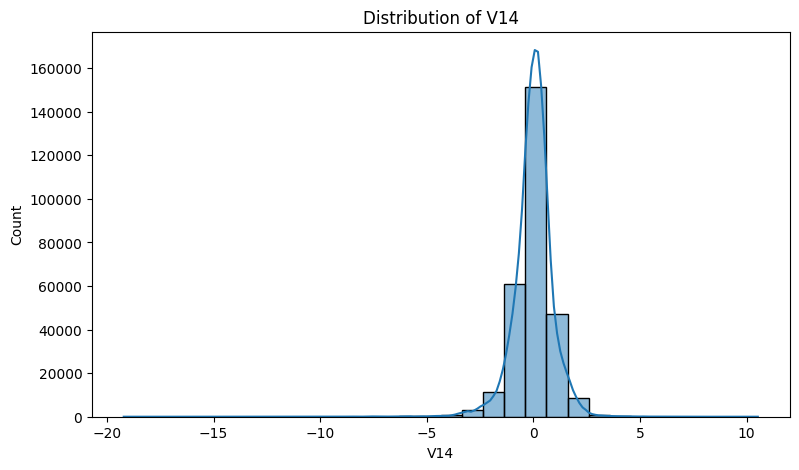

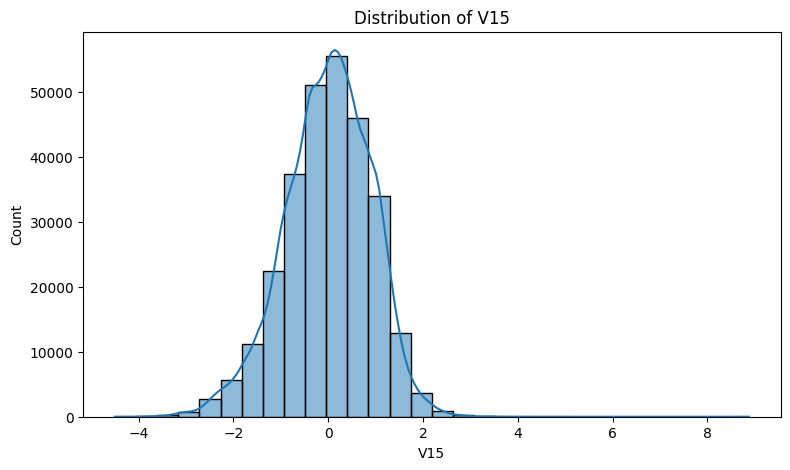

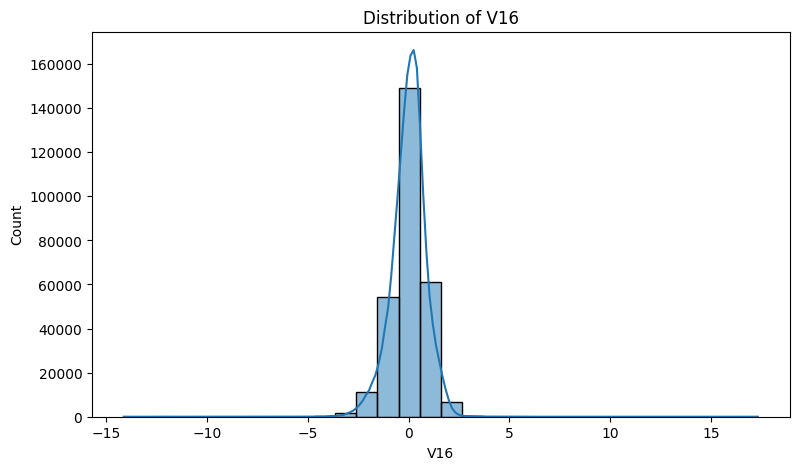

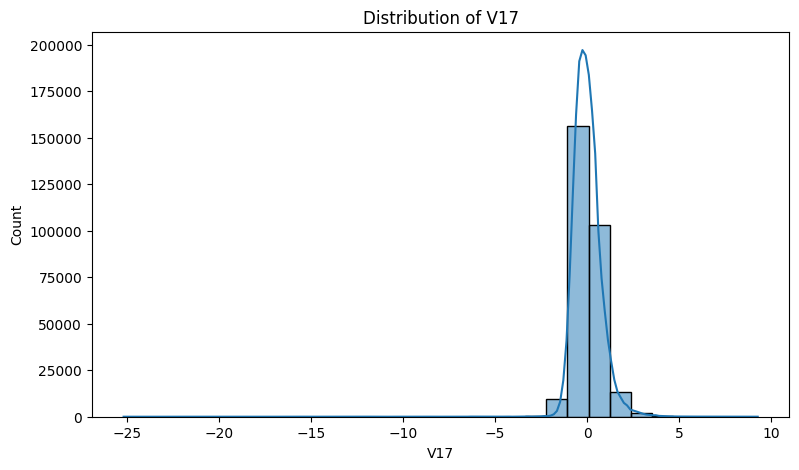

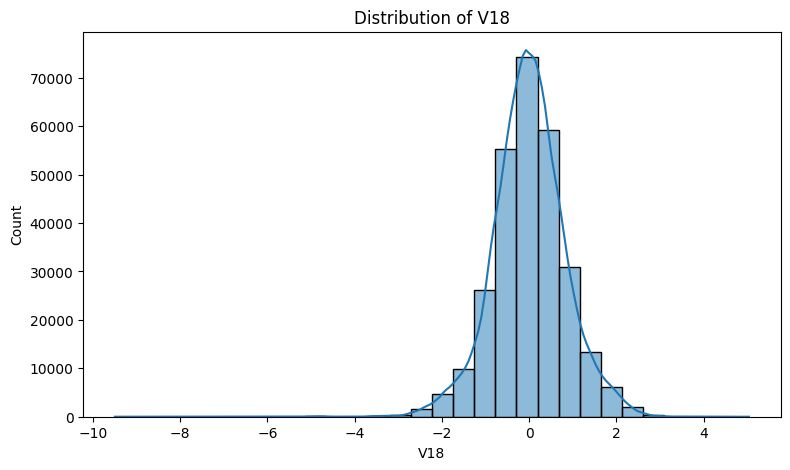

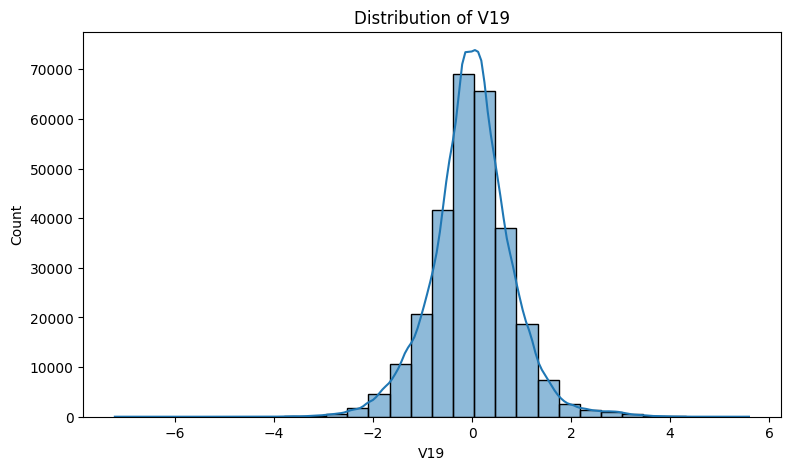

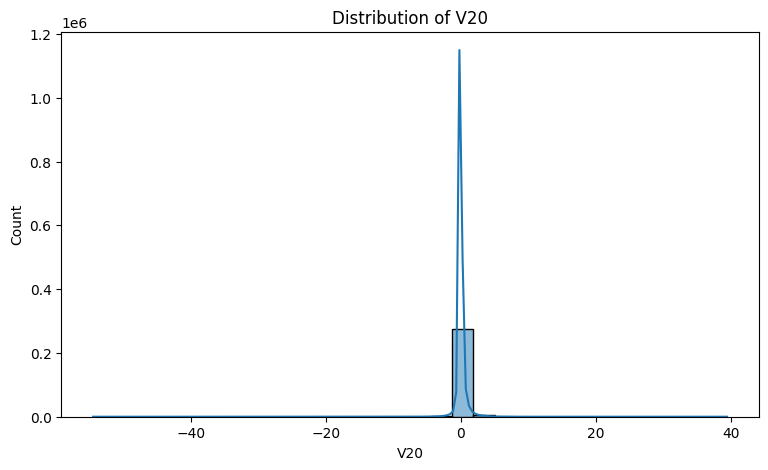

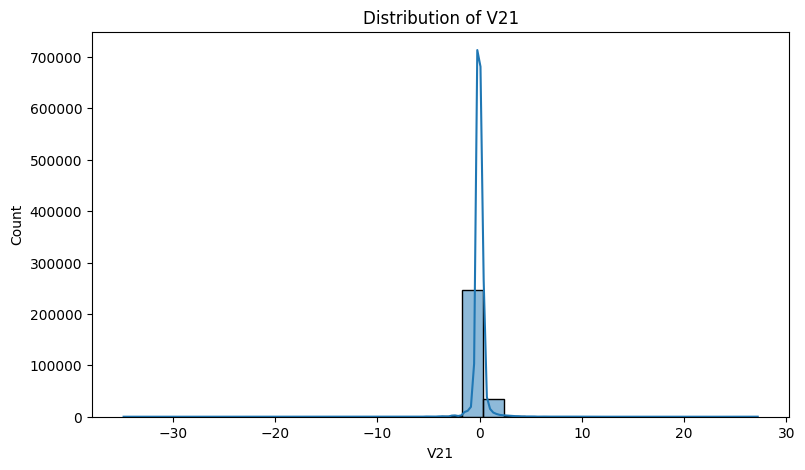

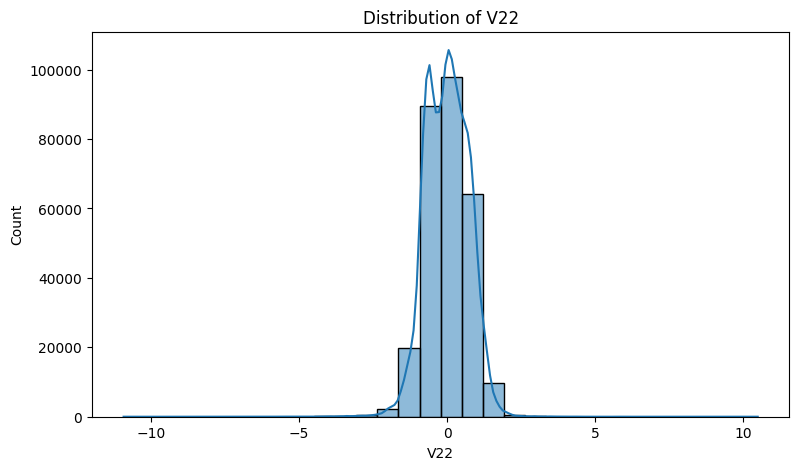

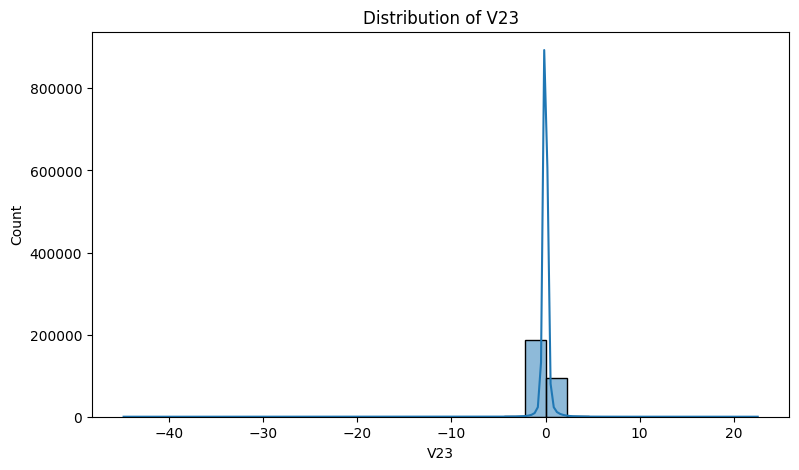

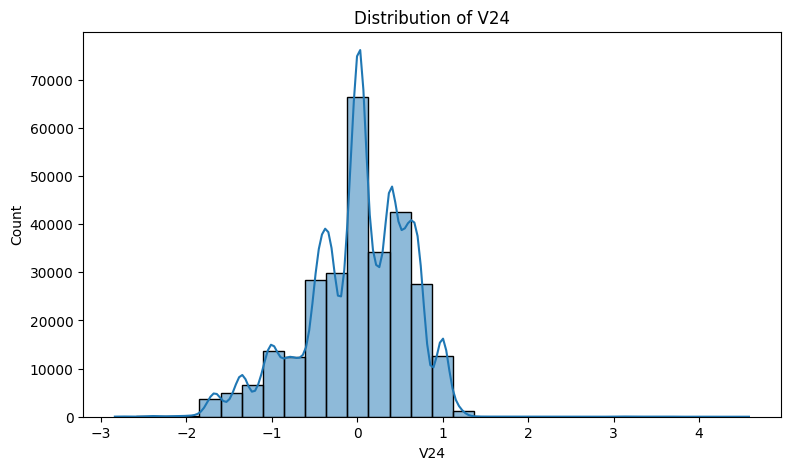

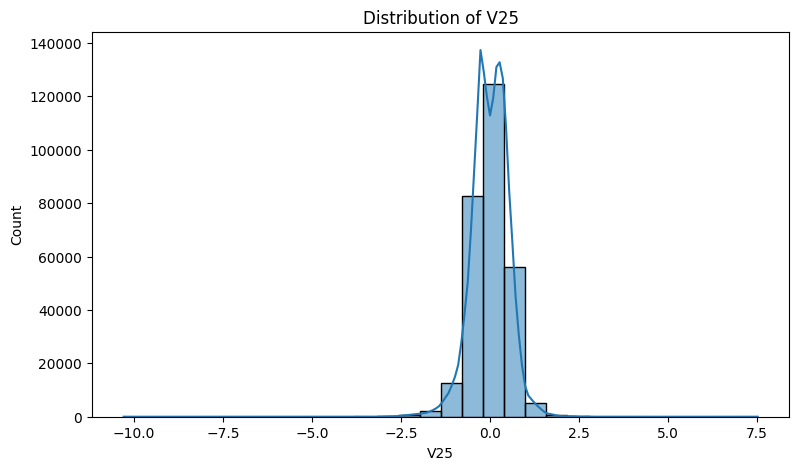

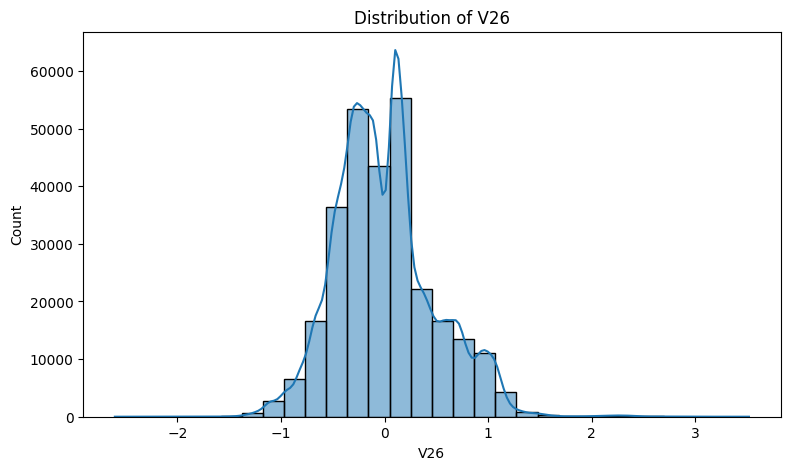

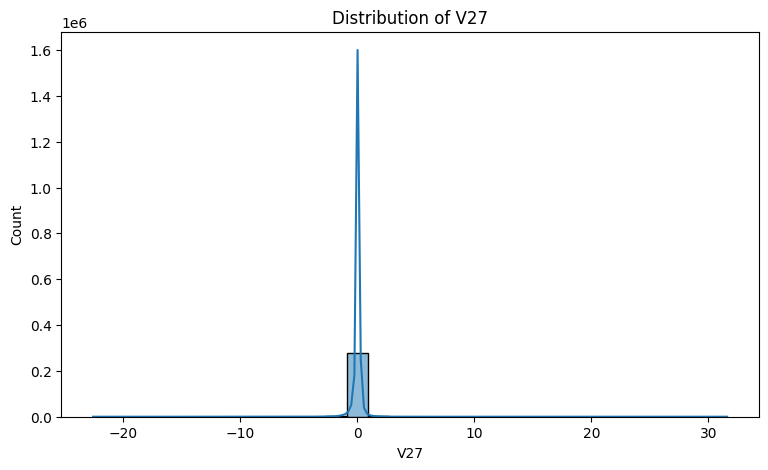

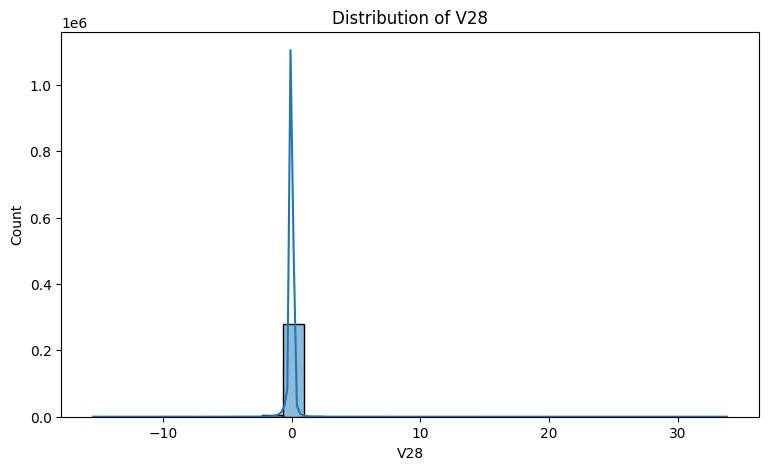

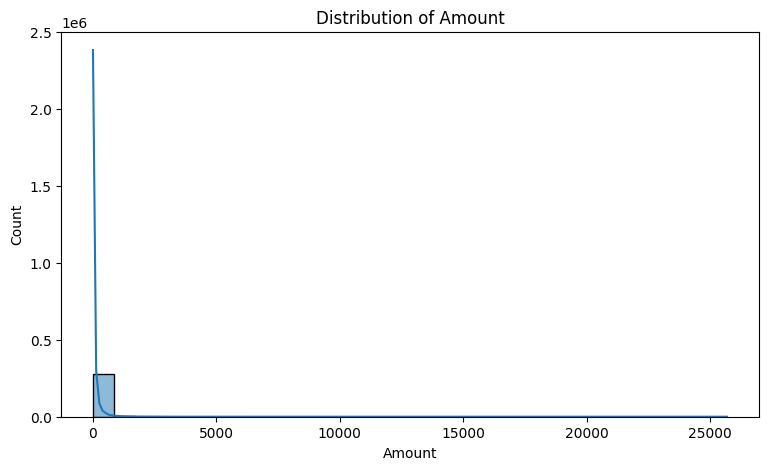

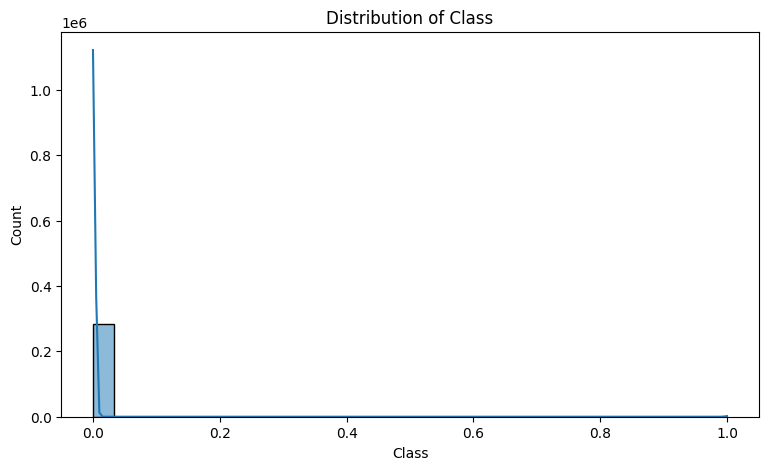

In [18]:
for column in project_10.select_dtypes(include = ["float64", "int64"]):
    plt.figure(figsize=(9, 5))
    sns.histplot(data=project_10, x=column, kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

## Separating Data 

In [19]:
X = project_10.drop(columns = "Class", axis = 1)
y = project_10["Class"]

In [20]:
X.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66


In [21]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

## Splitting Data 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(284807, 30) (227845, 30) (56962, 30)


In [24]:
print(y.shape, y_train.shape, y_test.shape)

(284807,) (227845,) (56962,)


## Feature Scaling with `StandardScaler`

In [25]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [26]:
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

## Model Training and Evaluating 

### Random Forests

In [27]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_std, y_train)

RandomForestClassifier()

In [29]:
model_rf_pred = model_rf.predict(X_test_std)
print(classification_report(y_test, model_rf_pred))
print("\n", confusion_matrix(y_test, model_rf_pred))
print("Precision (Hassasiyet) skoru:", precision_score(y_test, model_rf_pred), "\n")
print("Recall (Duyarlılık) Skoru:", recall_score(y_test, model_rf_pred), "\n")
print("F1 Skoru:", f1_score(y_test, model_rf_pred), "\n")
print("ROC AUC Skoru:", roc_auc_score(y_test, model_rf_pred), "\n")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.82      0.89        98

    accuracy                           1.00     56962
   macro avg       0.99      0.91      0.95     56962
weighted avg       1.00      1.00      1.00     56962


 [[56863     1]
 [   18    80]]
Precision (Hassasiyet) skoru: 0.9876543209876543 

Recall (Duyarlılık) Skoru: 0.8163265306122449 

F1 Skoru: 0.8938547486033519 

ROC AUC Skoru: 0.9081544723967246 



### Logistic Regression

In [30]:
model_lr = LogisticRegression()
model_lr.fit(X_train_std, y_train)

LogisticRegression()

In [31]:
model_lr_pred = model_lr.predict(X_test_std)
print(classification_report(y_test, model_lr_pred))
print("\n", confusion_matrix(y_test, model_lr_pred))
print("Precision (Hassasiyet) skoru:", precision_score(y_test, model_lr_pred), "\n")
print("Recall (Duyarlılık) Skoru:", recall_score(y_test, model_lr_pred), "\n")
print("F1 Skoru:", f1_score(y_test, model_lr_pred), "\n")
print("ROC AUC Skoru:", roc_auc_score(y_test, model_lr_pred), "\n")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.56      0.67        98

    accuracy                           1.00     56962
   macro avg       0.92      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962


 [[56854    10]
 [   43    55]]
Precision (Hassasiyet) skoru: 0.8461538461538461 

Recall (Duyarlılık) Skoru: 0.5612244897959183 

F1 Skoru: 0.6748466257668712 

ROC AUC Skoru: 0.7805243158039805 



## Veri Önişleme (Imbalanced Veri Seti ile Çalışırken Yapılabilir)

**Oversampling (Aşırı Örnekleme)**

+ ``SMOTE (Synthetic Minority Over-sampling Technique):`` Azınlık sınıfının örneklerini çoğaltarak dengeyi sağlar.
+ ``Random Over-sampling:`` Azınlık sınıfından rastgele örnekler alarak çoğaltma işlemi.

**Undersampling (Eksik Örnekleme)**

+ ``Random Undersampling:`` Çoğunluk sınıfından rastgele örnekler seçerek azınlık sınıfıyla dengeler.
+ ``Cluster Centroids:`` Çoğunluk sınıfını daha küçük kümelere indirger.

### Oversampling

In [32]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train_over, y_train_over = smote.fit_resample(X_train_std, y_train)

In [33]:
X_train_over.shape

(454902, 30)

In [34]:
y_train_over.value_counts()

Class
0    227451
1    227451
Name: count, dtype: int64

#### Random Forests

In [35]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train_over, y_train_over)

RandomForestClassifier()

In [36]:
random_forest_pred = random_forest.predict(X_test_std)
print(classification_report(y_test, random_forest_pred))
print("\n", confusion_matrix(y_test, random_forest_pred))
print("Precision (Hassasiyet) skoru:", precision_score(y_test, random_forest_pred), "\n")
print("Recall (Duyarlılık) Skoru:", recall_score(y_test, random_forest_pred), "\n")
print("F1 Skoru:", f1_score(y_test, random_forest_pred), "\n")
print("ROC AUC Skoru:", roc_auc_score(y_test, random_forest_pred), "\n")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.84      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962


 [[56855     9]
 [   16    82]]
Precision (Hassasiyet) skoru: 0.9010989010989011 

Recall (Duyarlılık) Skoru: 0.8367346938775511 

F1 Skoru: 0.8677248677248677 

ROC AUC Skoru: 0.9182882107541948 



#### Logistic Regression

In [37]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_over, y_train_over)

LogisticRegression()

In [38]:
logistic_regression_pred = logistic_regression.predict(X_test_std)
print(classification_report(y_test, logistic_regression_pred))
print("\n", confusion_matrix(y_test, logistic_regression_pred))
print("Precision (Hassasiyet) skoru:", precision_score(y_test, logistic_regression_pred), "\n")
print("Recall (Duyarlılık) Skoru:", recall_score(y_test, logistic_regression_pred), "\n")
print("F1 Skoru:", f1_score(y_test, logistic_regression_pred), "\n")
print("ROC AUC Skoru:", roc_auc_score(y_test, logistic_regression_pred), "\n")

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962


 [[55424  1440]
 [    8    90]]
Precision (Hassasiyet) skoru: 0.058823529411764705 

Recall (Duyarlılık) Skoru: 0.9183673469387755 

F1 Skoru: 0.11056511056511056 

ROC AUC Skoru: 0.9465218839364671 



### Undersampling

In [39]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_train_under, y_train_under = rus.fit_resample(X_train_std, y_train) 

In [40]:
X_train_under.shape

(788, 30)

In [41]:
y_train_under.value_counts()

Class
0    394
1    394
Name: count, dtype: int64

#### Logistic Regression

In [42]:
model_lr_under = LogisticRegression()
model_lr_under.fit(X_train_under, y_train_under)

LogisticRegression()

In [43]:
model_lr_under_pred = model_lr_under.predict(X_test_std)
print(classification_report(y_test, model_lr_under_pred))
print("\n", confusion_matrix(y_test, model_lr_under_pred))
print("Precision (Hassasiyet) skoru:", precision_score(y_test, model_lr_under_pred), "\n")
print("Recall (Duyarlılık) Skoru:", recall_score(y_test, model_lr_under_pred), "\n")
print("F1 Skoru:", f1_score(y_test, model_lr_under_pred), "\n")
print("ROC AUC Skoru:", roc_auc_score(y_test, model_lr_under_pred), "\n")

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.93      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962


 [[55092  1772]
 [    7    91]]
Precision (Hassasiyet) skoru: 0.048845947396672036 

Recall (Duyarlılık) Skoru: 0.9285714285714286 

F1 Skoru: 0.09280979092299847 

ROC AUC Skoru: 0.9487046788327036 



#### Random Forests

In [44]:
model_rf_under = RandomForestClassifier()
model_rf_under.fit(X_train_under, y_train_under)

RandomForestClassifier()

In [45]:
model_rf_under_pred = model_rf_under.predict(X_test_std)
print(classification_report(y_test, model_rf_under_pred))
print("\n", confusion_matrix(y_test, model_rf_under_pred))
print("Precision (Hassasiyet) skoru:", precision_score(y_test, model_rf_under_pred), "\n")
print("Recall (Duyarlılık) Skoru:", recall_score(y_test, model_rf_under_pred), "\n")
print("F1 Skoru:", f1_score(y_test, model_rf_under_pred), "\n")
print("ROC AUC Skoru:", roc_auc_score(y_test, model_rf_under_pred), "\n")

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.93      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962


 [[55425  1439]
 [    7    91]]
Precision (Hassasiyet) skoru: 0.05947712418300653 

Recall (Duyarlılık) Skoru: 0.9285714285714286 

F1 Skoru: 0.11179361179361179 

ROC AUC Skoru: 0.9516327176621915 



## Ağırlıklandırma (Imbalanced Veri Seti ile Çalışırken Yapılabilir)

+ Model eğitiminde sınıflara ağırlık vererek, modelin azınlık sınıfına daha fazla önem vermesini sağlar.

In [46]:
#Oversampling ya da Undersampling yapılmamış olan Train setleriyle: 
weight_rf = RandomForestClassifier()
weight_rf.fit(X_train_std, y_train)

RandomForestClassifier()

In [47]:
weight_rf_pred = weight_rf.predict(X_test_std)
print(classification_report(y_test, weight_rf_pred))
print("\n", confusion_matrix(y_test, weight_rf_pred))
print("Precision (Hassasiyet) skoru:", precision_score(y_test, weight_rf_pred), "\n")
print("Recall (Duyarlılık) Skoru:", recall_score(y_test, weight_rf_pred), "\n")
print("F1 Skoru:", f1_score(y_test, weight_rf_pred), "\n")
print("ROC AUC Skoru:", roc_auc_score(y_test, weight_rf_pred), "\n")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962


 [[56861     3]
 [   21    77]]
Precision (Hassasiyet) skoru: 0.9625 

Recall (Duyarlılık) Skoru: 0.7857142857142857 

F1 Skoru: 0.8651685393258427 

ROC AUC Skoru: 0.8928307641289491 

